<a href="https://colab.research.google.com/github/mickeykubo/analytics_book/blob/master/NumPy1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python言語によるビジネスアナリティクス
##実務家のための最適化，統計分析，機械学習（近代科学社）

## NumPy

NumPyモジュールの基本的な使用法を説明する．

NumPyは科学技術計算のための基本モジュールであり，リストに似た配列を扱う．

リストとの違いは：

* サイズが変更できない．

* 同じ種類のものしか保管できない（規定値は浮動小数点数）．

**zeros**は $0$ が入ったベクトルや行列を生成するための関数である．
これらはNumPyの**ndarray**（$n$次元配列）オブジェクトである．

In [0]:
import numpy as np #まずはインポート；別名は np が標準

In [2]:
z = np.zeros(5)  #長さ5の0ベクトルを生成
z

array([0., 0., 0., 0., 0.])

同様に，**ones**関数ですべての要素が $1$ のベクトルや行列を生成できる．

$0,1,2,\cdots,n$ の数列は**arange**関数で生成できる．これはPython標準の**range**関数に相当する． 

$n$ 行 $m$ 列の行列を生成するためには，引数をタプル $(n,m)$ とすれば良い．

In [3]:
e = np.ones( 10 )  #長さ10の単位ベクトル
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
seq = np.arange(10) #0,1,2,...9 の数列
seq

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
Z =np.zeros( (2,2) ) #2行2列の0行列を生成；引数に行数，列数のタプルを入力
Z

array([[0., 0.],
       [0., 0.]])

行列 $A$ の $i$ 行 $j$ 列の要素は，$A[i,j]$ でアクセスでき，代入も可能である．

（Pythonではインデックスは 0  から始まることに注意．）

たとえば，$3 \times 3$ の単位行列は最初に$3 \times 3$ の $0$ 行列を作って，後から対角成分に $1$ を代入することにより生成することができる．
```python
I = np.zeros( (3,3) ) 
I[0,0] =1. 
I[1,1] =1. 
I[2,2] =1.
>>> 結果
array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])
```

実は単位行列はeye関数を使えば1行で生成できる．
```python
I = np.eye(3)
```

 もしくは，以下のように**for**文による反復を用いた方が，より一般的である．
 

In [6]:
I = np.zeros( (3,3) )  
for i in range(3): 
    I[i,i]=1.0
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 問題

1. 長さ $10$ の $1$ が並んだベクトルを生成せよ．

2. $3$ 行 $4$ 列の $1$ だけが入った行列を生成せよ．

3. $(0,1)$, $(1,2)$, $(2,0)$ の成分だけが $1$ で，他の要素が $0$ の $3 \times 3$ 行列を生成せよ．

4. $i$ 行，$i+1$ 列だけ $1$ で，他の要素が $0$ の $10 \times 10$ 行列を生成せよ．
（ただし最後の行はすべて $0$ である．）

# ベクトルと行列の生成（array関数の使用法）と型(shape属性)

数字を自分で入れたベクトルや行列はNumPyのarray関数で生成できる．この関数の返値は多次元配列（ndarray）のオブジェクトである．

引数にリストを入れて，
```python
v = np.array( [4,5,6] )
```
とすればベクトル $v = (4,5,6)$ が生成される．

行列の場合には，行ごとのリストをもう1つのリストで入れ子にすることによって生成される．

たとえば，
```python
A  = np.array( [ [1,0,0],
               [-1, 1, 0],
               [0, -1, 1] ] )
```
とすれば，$3$ 行 $3$ 列の行列 $A$ が生成される．

また，引数dtypeでデータのタイプを指定できる．既定値は浮動小数点数であるが，上のようにすべて整数を入れると整数の要素をもつベクトルや配列が生成される．浮動小数点数を指定したい場合には，dtype=floatとする．
```python
v = np.array( [4,5,6], dtype=float) # array([4.,5.,6.])  
```

NumPyの多次元配列は型(shape)属性をもつ．たとえば，上で生成した行列 $A$ の型は $A.shape = (3,3)$ である．
これは$3$行$3$列の行列を意味する．

NumPyの多次元配列の型(shape)はshape属性にタプルを代入することによって変更できる．
ただし要素数(size)の変更はできない．たとえば，行列 $A$ を $1$ 行 $9$ 列の行列に変更するには，
```python
A.shape=(1,9) # array([[ 1.,  0.,  0., -1.,  1.,  0.,  0., -1.,  1.]])
```
とすれば良い．

上のベクトル $v$ の型 $v.shape$ はタプル $(3,)$ である．これは長さ $3$ のベクトル（列がない行列）を表す．
$1$ 行 $3$ 列の行列とは異なることに注意されたい．$1$ 行 $3$ 列に変更するには，
```python
v.shape=(1,3) # array( [[4, 5, 6]] )
```
とする．よく見ると外側に $[]$ が1つ増えている（元は $array( [4, 5, 6] )$ だった）．



### 問題

1. 以下の行列 $A$ を $9$ 行 $1$ 列の型に変更せよ．
2. 以下のベクトル $v$ を$3$ 行 $1$ 列の型に変更せよ．カッコがどのように変更されたか観察せよ．
3. 以下の行列 $A$ を $4$ 行 $2$ 列に変更することを試みよ．何が発生するか観察せよ．

In [0]:
A  = np.array( [ [1,0,0], [-1, 1, 0], [0, -1, 1] ]  )
v = np.array( [4,5,6] )

# 添え字(インデックス）とスライシングと演算

添え字とスライス表記はリストと同じ．
```python
L=[1,2,3,4] 
L[2]     # 3
L[1:3]   # [2,3] 
```

```python
x= np.array([1,2,3,4]) 
x[2]     # 3
x[1:3]   # array( [2,3] ) 
```

加算の結果は異なり，リストは結合，arrayの場合は要素ごとの和になる．(他の演算子に対しても同じである．）
```python
[1,2,3] + [4,5,6]                         # [1,2,3,4,5,6]
np.array( [1,2,3] ) + np.array( [4,5,6] ) # [5,7,9] 
```

NumPyのarray（ベクトル）とスカラーの和は，（後述するブロードキャストが行われ）スカラーをベクトルにコピーした後に和をとり，ベクトルとなる．
(他の演算子に対しても同じである．）
```python
np.array( [1,2,3] ) + 1    # [2,3,4] 
np.array( [1,2,3] ) * 10   # [10,20,30] 
```

### 問題
1. 以下のベクトル $x,y$ の和を計算せよ．
2. $x$ の最初の2つの要素と $y$ の最後の2つの要素の和を計算せよ．
3. ベクトル $x$ とスカラー $10$ との和を計算せよ．
4. ベクトル $x$ をスカラー $3$ で乗じた値を計算せよ．
5. $x$ と $y$ の積を計算せよ．（内積ではなく，要素ごとの積をとれ．）

In [0]:
x = np.array( [1, 2, 3] )
y = np.array( [5, 6, 7] ) 

# 行列に対する添え字（インデックス）とスライシングと演算

2次元の配列（行列）の添え字は**配列[行番号,列場号]**でアクセスできる．

```python
X = np.array( [[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
X[0,1]   #　2
```      

スライシングはリストのときと同様に，** 開始番号:終了番号 ** で開始番号から終了番号 $-1$ の切り出しを行う．

行と列に対して別々に切り出しを行うことができる．たとえば，すべての行(:)と1列目を指定すると，1列目だけを切り出すことができる．

```python
X[ : , 1]  #array([2, 5, 8])
```   

同様に1行目だけを切り出すには，
```python
X[ 1, : ]  #X[1] としても同じ！  array([4, 5, 6]) を返す．　
```   
とする．

演算もベクトルと同様に行われる．スカラーに対する演算は，後述するブロードキャスト（同じ大きさになるようにコピーしてから演算）が行われる．

### 問題

1. 行列 $X$ の3行2列目の要素を出力せよ．
2. 行列 $X$ の2行目だけを切り出せ．
3. 行列 $X$ の1-2行と2-3列から成る部分行列 $[[2,3], [5,6]]$ を切り出せ．
4. $X$ と $Y$ の和を求めよ．
5. $X$ と $Y$ の積を求めよ．また $X$ とスカラー $1$ の積，ベクトル $(1,1,1)$ との積と較べてみよ．

In [0]:
X = np.array( [[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
Y = np.ones( (3,3) ) 

# ユニバーサル関数

NumPyの以下の関数はユニバーサル関数である．

- Arithmetic Operators: + - * / // % **
- Bitwise Operators: & | ~ ^ >> <<
- Comparison Oper’s: < > <= >= == !=
- Trig Family: np.sin, np.cos, np.tan ...
- Exponential Family: np.exp, np.log, np.log10 ...

これらを用いることによって多次元配列の各要素に対する演算を高速に行うことができる．

たとえば，0から10000-1の整数の配列に対して，すべての要素に $5$ を加えるには，以下のようにする．

```python
x = np.arange(10000) #0から10000-1の整数の配列を生成
x + 5 # スカラーを加えると後述のブロードキャストによって全ての要素にスカラーが足される
```

同じ配列に対して平方根をとるには，
```python
np.sqrt(x)
```
とする．NumPyモジュールのsqrt関数はユニバーサル関数なので，すべての要素に対して平方根を計算して返す．
（数学モジュールmathの平方根だとエラーする．）

### 問題

1. 0から99の整数が入った配列を生成し，正弦(sin）を計算せよ．
2. 1から999の整数が入った配列の要素を2倍し，それに対数(log)をとったものに100を加えた配列を生成せよ．

# NumPyの擬似乱数発生サブモジュール random 

通常のrandomモジュールと類似の擬似乱数がNumPyでも生成できる．

ただし引数sizeでランダムな要素をもつ配列を一度に生成できる．

たとえば，5つの[0,1)の一様乱数の生成は以下のようになる．
```python 
np.random.random(size=5) # array([ 0.19672059,  0.91704669,  0.05184376,  0.13490049,  0.13663051])
```

整数の乱数を生成するにはrandintを用いる．引数は通常の下限(low)，上限(high)の他に，sizeを指定できる．
sizeにタプルを入れると多次元の配列が生成される．
```python 
np.random.randint(1, 6, size=(3,3))
>>> 結果
array([[4, 5, 5],
       [1, 4, 1],
       [1, 4, 1]])
```

正規分布にしたがうランダムな値を得るにはnormalが使える．
```python
np.random.normal(100,10,(2,2)) #平均100，標準偏差10にしたがう正規乱数を2行2列の行列に入れる
>>> 結果
array([[ 92.24228997,  85.74292368],
       [ 83.08779098,  99.39865564]])
```
他にも様々な分布にしたがうランダムな値を生成できる．

### 問題

1. さいころを $10$回振ったシミュレーション結果を表す配列を生成せよ．
2. 平均 $10$，標準偏差 $10$ の正規乱数を $10 \times 10$ の行列に入れよ．

# 集約関数

NumPyの関数で多次元配列内の値を集約して計算してくれるものがある．
```python
min, max, sum, mean, average, argmin, argmax, std などなど
```

In [10]:
x =np.random.randint(low=1, high=100, size=10)
x

array([54, 24, 26, 20, 74, 61, 37, 30, 24, 57])

In [11]:
np.min(x)   #最小値を求める

20

In [12]:
np.argmin(x) #最小値になるインデックス

3

In [13]:
np.sum(x)  #合計を求める

407

In [14]:
np.std(x) #標準偏差を求める

18.149655644116226

In [15]:
A =np.random.randint(low=1,high=100, size=(3,5)) #ランダムな要素を含んだ行列 A を生成
A

array([[46, 13, 57, 86, 52],
       [89, 73, 36, 47, 21],
       [40,  7, 36, 23,  3]])

In [16]:
np.sum(A, axis=0) #行方向（軸番号=0)で合計

array([175,  93, 129, 156,  76])

In [17]:
np.sum(A, axis=1) #列方向（軸番号=1)で合計

array([254, 266, 109])

### 問題

1. 上の行列Aの行ごとの最小値を求めよ．
2. 同じ行列の列ごとの最小値を求めよ．
3. さいころを $10$回振ったときの結果の配列を作成し，試行の中の最小値，最大値，平均値を出力せよ．
4. 平均 $10$，標準偏差 $10$ の正規乱数を $10 \times 10$ の行列に入れ，全体の平均，行ごとの平均を出力せよ．


# ブロードキャスト

```python
 多次元配列 = 多次元配列 + スカラー
```
になるのは，同じ型になるように変形してから演算を行うためである．


``` python
x= np.arange(5)  # [0 1 2 3 4]  型は (5,)
x + 10           # 結果は array([10, 11, 12, 13, 14])
```

スカラー10をxと同じ型(5,)になるようにコピーしてから加算をしている．
``` python
x+ np.array([10,10,10,10,10]) #スカラー10を1次元配列にしてから，同じ長さになるまでコピー（ブロードキャスト）
```

同様に3行3列の行列 A と長さ3のベクトルxの加算を試してみる．

In [18]:
A = np.ones( (3,3) )
x = np.array( [10,20,30])
print( 'A=', A)
print( 'x=', x)
print(A.shape, x.shape)

A= [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
x= [10 20 30]
(3, 3) (3,)


In [19]:
A+x #ブロードキャストを用いた加算

array([[11., 21., 31.],
       [11., 21., 31.],
       [11., 21., 31.]])

In [20]:
A+np.array( [[10,20,30], 
             [10,20,30],
             [10,20,30]] ) #[10,20,30] のコピーを作成してから加算

array([[11., 21., 31.],
       [11., 21., 31.],
       [11., 21., 31.]])

In [21]:
x = np.array( [[1.,2,3]] ).T  #3行1列の行列（縦ベクトル）
y = np.array( [10,20,30])     #長さ3の横ベクトル
print("x=",x)
print("y=",y)
print(x.shape, y.shape)

x= [[1.]
 [2.]
 [3.]]
y= [10 20 30]
(3, 1) (3,)


In [22]:
x+y #ブロードキャストによる加算

array([[11., 21., 31.],
       [12., 22., 32.],
       [13., 23., 33.]])

In [23]:
np.array([[1,1,1],
          [2,2,2],
          [3,3,3]])+np.array( [[10,20,30], 
                              [10,20,30],
                             [10,20,30]] ) #コピーを作成してから加算 

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

# インデックス配列

NumPyでは，添え字を別の配列で指定できる．この機能はpandasでよく使うので，慣れておく必要がある．

添え字の配列（もしくはリスト）を用いて配列 $x$ から添え字に対応する要素を取り出す．

```python 
x = np.array( [1,2,3,4,5,6] )
ind = np.array( [1,3,5] )  # リスト [1,3,5] でも同じ
x[ind]

>>> 結果
array([2, 4, 6])
```

NumPyの配列に対して要素がTrueかFalseになる条件式を書くと，要素がTrueかFalseの配列が生成される．
これをBoolインデックス配列とよぶ．
```python 
x = np.array( [1,2,3,4,5,6] )
x%2 == 1 #2で割ったときの余りが1か？

>>> 結果
array([ True, False,  True, False,  True, False], dtype=bool)
```

この配列の要素がTrueの部分だけを切り出すことができる．
```python 
x = np.array( [1,2,3,4,5,6] )
bool_index = x%2 == 1 
x[ bool_index ]

>>> 結果
array([1, 3, 5])
```

これを1行で行うと
```python 
 x[ x%2==1 ]
```
と書ける．

複数の論理条件を入れる場合には，集合(set)に対する演算子を用いる．

かつ（and）は &，または（or）は | である．論理条件には必ず( )をつけて区分を明確にする．
たとえば，偶数で $4$以上のものを切り出すには，
```python 
x[ (x%2==0) & (x>=4) ] # array([4, 6])
```
とする．

例として，ランダムに生成した長さ10の配列から，条件を満たすものを切り出してみる．


In [24]:
x = np.random.randint(low=1,high=100, size=10) #[1,99]の一様乱数による配列
x

array([13, 65, 63, 28, 80, 38, 74, 92, 88, 73])

In [25]:
bool_index = x < 30  #条件を満たすなら True の配列(Boolインデックス配列)
bool_index

array([ True, False, False,  True, False, False, False, False, False,
       False])

In [26]:
x[ bool_index ] #配列 bool_index がTrueのインデックスから成る配列

array([13, 28])

In [27]:
x[ x <30 ] #上の操作を1行で書く

array([13, 28])

In [28]:
x[ (x<=30) & (x>=10) ]  #30以下でかつ10以上のもの（and は & を使う；論理条件には( )をつける) 

array([13, 28])

In [29]:
x[ (x<30) | (x%2==0) ] #30以下かもしくは2で割り切れるもの

array([13, 28, 80, 38, 74, 92, 88])

In [30]:
x = np.random.randint(low=1,high=100, size=10) #[1,100]の一様乱数による配列
print(x)
np.all( x <=90 ) #すべてがTrueのときTrueを返す

[17 29 93 56 65  6 41 48  8 62]


False

In [31]:
np.any( x <=10 )   #いずれかの要素がTrueのときTrueを返す

True

### 問題

NumPyの配列 $x$ を以下のように生成する．
```python 
x = np.array( [1,2,3,4,5,6] )
```

1. 添え字が $0$ 番目と $5$ 番目の要素を添え字配列を用いて取り出せ．
2. 要素が2で割り切れるものだけをTrueかFalseが入った配列（Bool添え字配列）を用いて取り出せ．
3. 要素が奇数のものだけを2倍せよ．

### 問題
1. さいころを $10$回振ったときの結果の配列を作成し，試行の中で $4$ 以上のものだけを切り出せ．
2. さいころを $100$回振ったときの結果の配列を作成し，試行の中で $5$ 以上で奇数のものだけを切り出せ．3
3. 平均 $10$，標準偏差 $10$ の正規乱数を $10 \times 10$ の行列に入れ，負のものだけを切り出せ．

### 問題

次のプログラムは入力した正の整数 x に対して何を返すためのプログラムか？

```python 
not np.any([x%i == 0 for i in range(2, x)])
```

### NumPyによる数列の生成法

NumPyには様々な数列を生成するための関数が準備されている．

通常のリストと同じように整数の配列を生成するためには，arange関数を用いる．

引数は，開始，終了，ステップ（階差）である．

```python
x = np.arange(1,11,2) # array([1, 3, 5, 7, 9])
```

配列のサイズ(要素の個数）を指定して階差が等しくなるような数列を生成するには，linspace（線形空間を表すline spaceの意味）関数を用いる．

引数は，開始，終了，要素数であるが，既定値だと最後の要素が終了と一致するように生成することに注意されたい．
```python
x = np.linspace(1,6,10)
>>> 結果
array([ 1.        ,  1.55555556,  2.11111111,  2.66666667,  3.22222222,
        3.77777778,  4.33333333,  4.88888889,  5.44444444,  6.        ])
```

linspace関数はmatplotlibで関数の図を描画するときによく用いられる．以下に $y=x^2$ のグラフを描画した例を示す．

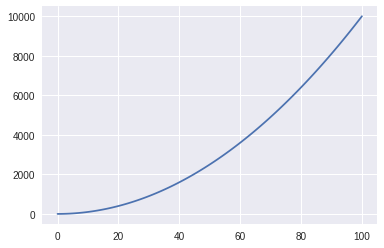

In [32]:
x = np.linspace(0,100,100)  # 0から1まで均等割りした100個の要素から成る配列
y = x**2                   # 同じ長さの配列に xの2乗を入れる
import matplotlib.pyplot as plt # 図を描画する準備
%matplotlib inline
plt.plot(x,y) # 描画

### 問題

1. $x$ に1から100まで公差3の数列を代入し，$x$ の平方根のグラフをプロットせよ．ただし，平方根はNumPyのsqrt関数で計算せよ．(NumPyモジュールのsqrt関数はユニバーサル関数である．mathモジュールのsqrt関数を用いると，スカラーしか計算できないことに注意．）

2. 0.1から10まで1000個の数値を均等に配置した $x$ 座標に対して $y=1/x$ の関数を描画せよ．

In [0]:
import matplotlib.pyplot as plt # 図を描画する準備
%matplotlib inline
